In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [9]:
! unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range = 0.2,horizontal_flip= True,vertical_flip= False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
x_train = train = train_datagen.flow_from_directory(r"/content/drive/MyDrive//flowers/daisy",target_size = (10,10),class_mode ='categorical',batch_size=10)


Found 0 images belonging to 0 classes.


In [14]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers/rose",target_size = (1,5),class_mode ='categorical',batch_size=10)


Found 0 images belonging to 0 classes.


In [15]:
x_train.class_indices


{}

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
model= Sequential()


In [17]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = 'relu')) #Feature Map


In [18]:
model.add(MaxPooling2D(pool_size = (2,2))) 


In [19]:
model.add(Flatten())


In [20]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150,activation ='relu'))

In [21]:
model.add(Dense(4,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [23]:
model.save('flowers.h5')

In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('flowers.h5')

In [25]:
img = image.load_img(r'/content/drive/MyDrive/flowers/tulip/7166552648_28b6dce578.jpg')

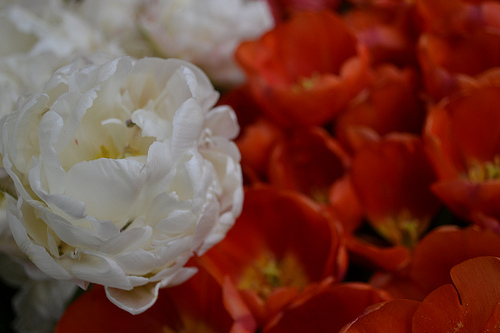

In [26]:
img

In [28]:
img = image.load_img(r'/content/drive/MyDrive/flowers/tulip/7166552648_28b6dce578.jpg',target_size=(64,64))

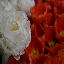

In [29]:
img

In [30]:
x=image.img_to_array(img)
x

array([[[122., 122., 114.],
        [120., 120., 112.],
        [123., 122., 118.],
        ...,
        [107.,  14.,   0.],
        [132.,  31.,  11.],
        [124.,  28.,   4.]],

       [[121., 120., 115.],
        [132., 132., 132.],
        [135., 135., 135.],
        ...,
        [116.,  32.,  32.],
        [153.,  55.,  46.],
        [156.,  53.,  36.]],

       [[130., 130., 128.],
        [141., 146., 150.],
        [149., 152., 159.],
        ...,
        [114.,  29.,  36.],
        [146.,  44.,  30.],
        [154.,  53.,  45.]],

       ...,

       [[  3.,   5.,   2.],
        [  1.,   1.,   0.],
        [ 31.,  31.,  23.],
        ...,
        [103.,  15.,   1.],
        [107.,  12.,   6.],
        [125.,  26.,   3.]],

       [[  1.,   6.,   0.],
        [ 10.,  12.,   7.],
        [ 37.,  36.,  31.],
        ...,
        [100.,  14.,   1.],
        [122.,  26.,   2.],
        [120.,  29.,   2.]],

       [[  3.,   8.,   1.],
        [  2.,   2.,   0.],
        [ 37.,  

In [31]:
x.shape

(64, 64, 3)

In [32]:
x= np.expand_dims(x,axis=0)

In [33]:
y = np.argmax(model.predict(x), axis=1)
y

array([1])

In [34]:
index = ['daisy','dandelion','rose','sunflower','tulip']

In [38]:
index[y[0]]

'dandelion'